**Sentiment Analysis of Youtube Comments**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/jyotijauhari/Data-Analysis/main/DataSet/comments.csv'
#read dataset
comments=pd.read_csv(url, error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [ ]:
comments.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [ ]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [ ]:
comments.dropna(inplace=True)

In [ ]:
polarity = []
for i in comments['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
comments['polarity'] = polarity

In [ ]:
comments.head()

**Exploratory data analysis for positive sentences**


In [ ]:
positive_comments = comments[comments['polarity'] == 1]

In [ ]:
positive_comments.head()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
total_Comments = ' '.join(positive_comments['comment_text'])

In [ ]:
wordcloud = WordCloud( width = 1000, height = 500, stopwords=stopwords ).generate(total_Comments)

(-0.5, 999.5, 499.5, -0.5)

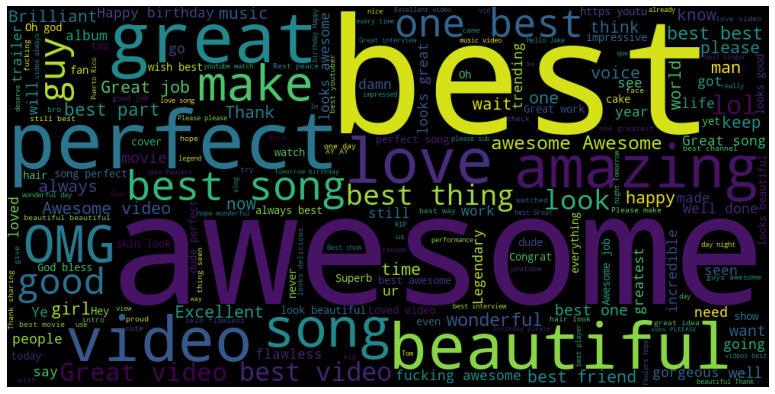

In [ ]:
plt.figure(figsize=(70,7))
plt.imshow(wordcloud)
plt.axis('off')

**EDA for negative comments**

In [ ]:
comments_negative=comments[comments['polarity']==-1]

In [ ]:
comments_negative.shape

(3339, 5)

In [ ]:
comments_negative.head()

video_id  ... polarity
1387  ql0Op1VcELw  ...     -1.0
1394  ql0Op1VcELw  ...     -1.0
1530  -Ifnaxi2LQg  ...     -1.0
1745  F2uJvwiSZAQ  ...     -1.0
1793  F2uJvwiSZAQ  ...     -1.0

[5 rows x 5 columns]

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords=set(STOPWORDS)

In [ ]:
total_Ncomments=' '.join(comments_negative['comment_text'])

In [ ]:
wordcloudN=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_Ncomments)

(-0.5, 999.5, 499.5, -0.5)

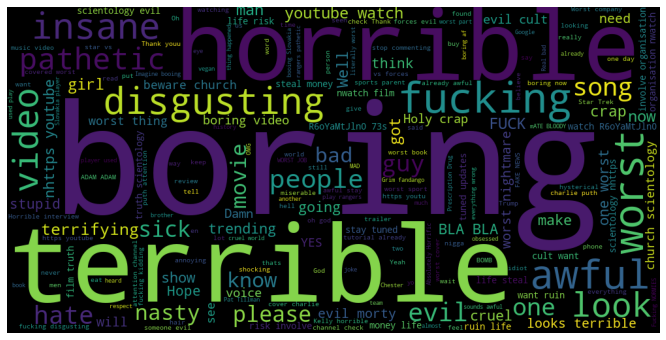

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(wordcloudN)
plt.axis('off')

## Analysing Tags column,what are trending tags on youtube

In [ ]:
url = 'https://raw.githubusercontent.com/jyotijauhari/Data-Analysis/main/DataSet/videos.csv'
videos = pd.read_csv(url, error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [ ]:
videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [ ]:
tags_complete=' '.join(videos['tags'])
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [ ]:
import re #regular expression module

In [ ]:
tags = re.sub('[^a-zA-Z]', ' ', tags_complete) #substitute
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [ ]:
tags = re.sub(' +', ' ', tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [43]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

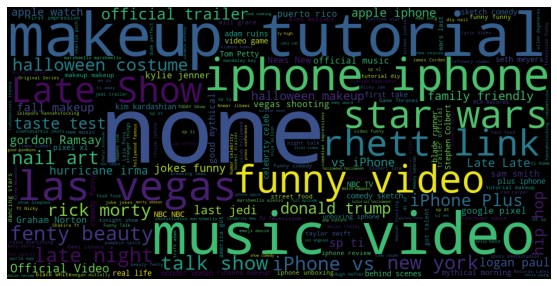

In [44]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for views & likes')

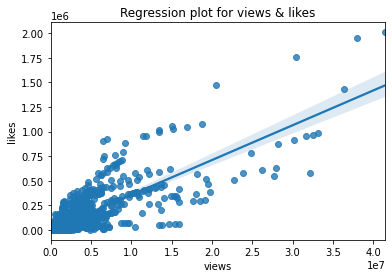

In [45]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

In [46]:
df_corr=videos[['views','likes','dislikes']]

In [47]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

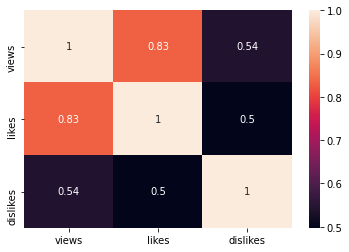

In [48]:
sns.heatmap(df_corr.corr(),annot=True)